### Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Load the extracted CSV Files

In [21]:
orders = pd.read_csv(r"C:\Users\USER\Desktop\Data Science\Pizza-Place-Sales\pizza_sales\orders.csv")
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [22]:
order_details = pd.read_csv(r"C:\Users\USER\Desktop\Data Science\Pizza-Place-Sales\pizza_sales\order_details.csv")

order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [23]:
pizzas = pd.read_csv(r"C:\Users\USER\Desktop\Data Science\Pizza-Place-Sales\pizza_sales\pizzas.csv")

pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [24]:
pizza_types = pd.read_csv(r"C:\Users\USER\Desktop\Data Science\Pizza-Place-Sales\pizza_sales\pizza_types.csv", encoding="latin1")

pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


### Merge All Tables (Step by Step Merge)

In [25]:
# merge order_details with pizzas
df = order_details.merge(pizzas, on="pizza_id")

# merge with pizza_types
df = df.merge(pizza_types, on="pizza_type_id")

# merge with orders
df = df.merge(orders, on="order_id")

df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,179,77,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02,12:22:46
2,178,77,bbq_ckn_m,1,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",2015-01-02,12:22:46
3,357,146,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03,14:22:10
4,355,146,cali_ckn_l,1,cali_ckn,L,20.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",2015-01-03,14:22:10


### Create Revenue Column

In [26]:
df["revenue"] = df["quantity"] * df["price"]

### Fix Date and Time

In [27]:
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])


### Create Helpful Columns

In [28]:
df["hour"] = df["time"].dt.hour
df["day"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month_name()


In [29]:
df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
date                0
time                0
revenue             0
hour                0
day                 0
month               0
dtype: int64

## Answering Questions 

## Q.1 Total Revenue

In [30]:
total_revenue = df["revenue"].sum()  
total_revenue

817860.05

Total revenue generated from pizza sales is $817,860.05.
This represents total business income for the year.


## Q.2  Total Quantity Sold

In [31]:
df["quantity"].sum()

49574

 A total of 49,574 pizzas were sold across all orders.

## Q.3 Total Orders

In [32]:
orders["order_id"].nunique()

21350

There were 21,350 unique orders placed during the year.

## Q.4 Total  Pizza Types

In [33]:
pizza_types["name"].nunique()

32

There are 32 unique types of pizzas

## Q.5 Average Price of Pizzaz

In [34]:
pizzas["price"].mean()

16.440625

 The average price per pizza is $16.440625

## Q.6 Peak Hours of Sales

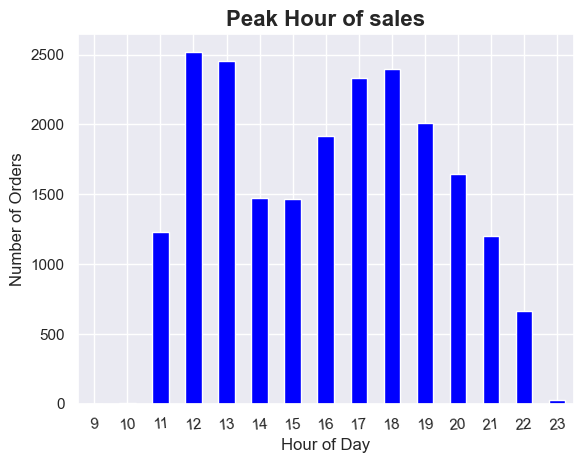

In [35]:
orders["hour"] = pd.to_datetime(orders["time"]).dt.hour    

hourly_orders = orders.groupby("hour").size()

hourly_orders.plot(kind="bar", color="blue")
plt.xticks(rotation=5)
plt.title("Peak Hour of sales", fontsize=16, fontweight= "bold")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.show()

From the barchart above, the peak hours of sales are during lunch (12:00pm - 13:00pm) and dinner (17:00pm-19:00pm) time.

## Q.7 Sales by Day of the Week

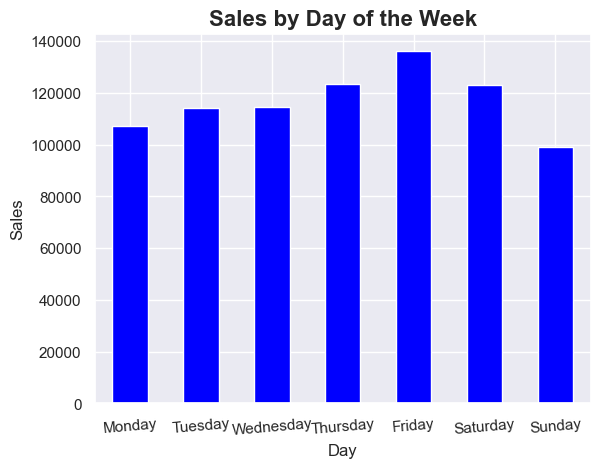

In [49]:
df["date"] = pd.to_datetime(df["date"])                 
df["day"] = df["date"].dt.day_name()


sales_by_day = df.groupby("day")["revenue"].sum()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sales_by_day = sales_by_day.reindex(day_order)

sales_by_day.plot(kind="bar", color="blue")

plt.xticks(rotation=5)
plt.title("Sales by Day of the Week", fontsize=16, fontweight= "bold")
plt.xlabel("Day", fontsize=12)
plt.ylabel("Sales", fontsize=12)

plt.show()

 Weekends (Friday and Saturday) has the most or highest sales in the week while Sunday has the lowest sales.

## Q.8 Top 5 Bestselling Pizzas

In [46]:
top5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)   
top5

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

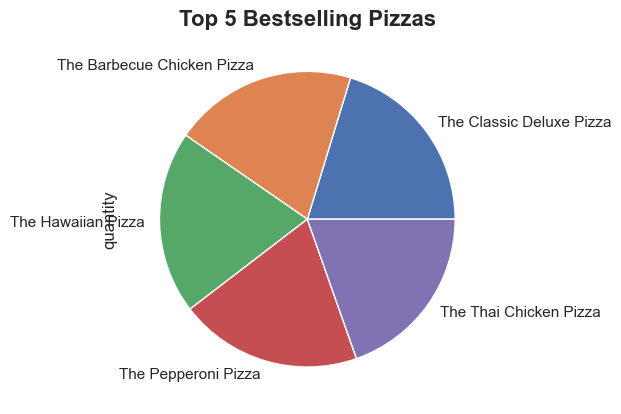

In [94]:
top5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)  
top5.plot(kind="pie")


plt.title("Top 5 Bestselling Pizzas", fontsize=16, fontweight= "bold")

plt.show()

#### These are the five bestselling pizzas in the restaurant
The Classic Deluxe Pizza      
The Barbecue Chicken Pizza    
The Hawaiian Pizza            
The Pepperoni Pizza           
The Thai Chicken Pizza        

## Q.9 Monthly Sales Trend

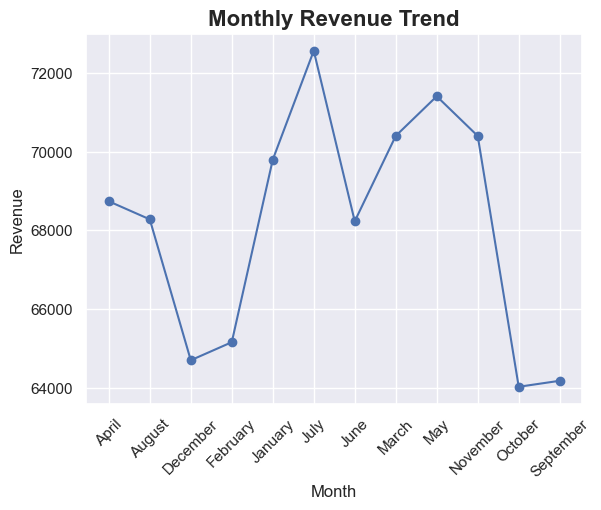

In [83]:
monthly = df.groupby(["month"])["revenue"].sum().reset_index()
monthly = monthly.sort_values("month")

plt.plot(monthly["month"], monthly["revenue"], marker ="o")
plt.title("Monthly Revenue Trend", fontsize=16, fontweight= "bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)

plt.show()



The sales are relatively consistent throughout the year, but there are noticeable peaks. Peak months are JULY and MAY which shows highest sales volume. There is a drop in october.

## Q.10 Poor Performing Pizzas

In [84]:
worst5 = df.groupby("name")["quantity"].sum().sort_values().head(5)   
worst5

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

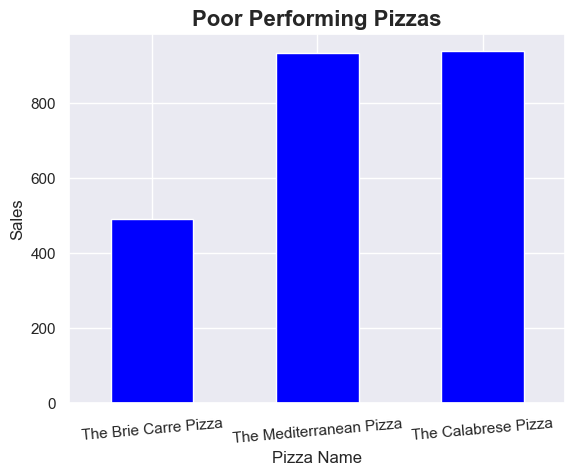

In [90]:
worst5 = df.groupby("name")["quantity"].sum().sort_values().head(3)   
worst5.plot(kind="bar", color="blue")

plt.xticks(rotation=5)
plt.title("Poor Performing Pizzas", fontsize=16, fontweight= "bold")
plt.xlabel("Pizza Name", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

#### The five poor performing pizzas are 
The Brie Carre Pizza        
The Mediterranean Pizza     
The Calabrese Pizza         
The Spinach Supreme Pizza    
The Soppressata Pizza        

## EXTRA INSIGHTS 

### Category Performance

In [95]:
df.groupby("category")["revenue"].sum()

category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: revenue, dtype: float64

 The highest revenue is generated by Classic while veggie generates the lowest.

### Size Performance

In [96]:
df.groupby("size")["revenue"].sum()

size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64

The Large(L) size has the best performance while XXL size has the worst performance. This can be due to price variation based on different sizes.